# Data Incubator Project Proposal

The proposed project will use data provided by Thinknum that tracks social media interactions of Facebook users with businesses on Facebook. For example, the data includes counts for likes and check-ins for the businesses. Facebook is a company that currently has a market valuation of roughly half a trillion dollars. While a lot of the companies value resides in its function as an advertising platform, the data they provide is a source of significant value. With over 2 billion active monthly users it is no surprise that Facebook generates valuable data. 

What business understanding can we gain from this data? One important question that we cannot answer with this data is the values of social media interactions on Facebook for a particular business. Is it worth the associated cost for a business to put effort into generating more likes on Facebook? This dataset does not include financial data for the businesses and so without bringing in more information we cannot answer this sort of question. But given the significant effort businesses put into developing a social media, in general the default presumption is that social media interactions are valuable. This raises the question of how well a business is doing with respect to generating social media interactions. This is a question we can gain some insight on using this dataset.

We want to evaluate how many likes, how many check-ins, how many mentions, etc. is a good number for a business. Ideally, we would do a cost-benefit analysis where we weigh the cost of generating more social interactions against the cost of generating them. But, as mentioned above we cannot do such an analysis with this dataset. We will need a different and less direct strategy to address the question. The dataset contains information for thousands of business and so what we can do with the dataset is make comparisons between different businesses. So, while we cannot evaluate a business' social media presence outright, we can evaluate a business' social media presence relative to other businesses. For a given business, we can consider similar businesses and/or competitors. Another way we can utilize the dataset is to look at a business' performance over time with respect to generating social media interactions on Facebook. This would enable a business to look back at what was going on with the business at various times and see what if any effect it had on the number of social media interactions on Facebook. 

The project I propose to complete is to create a web app that takes as an input a selection of businesses for which we have data and outputs visualizations that tell a story about how the businesses perform with respect to generating social media interactions over time and if multiple companies are selected how they compare with each other. I will use heroku, flask, and bokeh to complete the project. I will need to learn how to use these tools in order to complete the project. The project will then give me some experience using what I have learned and serve to demonstrate my abilities. 

To illustrate a bit of what the project has to offer I have created a couple visualizations. 

In [2]:
#import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

#Load in Data
facebook = pd.read_csv('C:\\Users\\jpkel\\Desktop\\Datasets\\datalab_records_social_facebook.csv', parse_dates=['time', 'date_added','date_updated'])

### First Visualization:
The code creates a metric that measures volatility of "talking_about_count" for a business so we can see which companies have high voltility and which have low volatility. (Note that this code takes awhile to run and is not needed to run the rest of the code in this notebook.)

In [ ]:
username_list = list(set(facebook.username.values))

volatility_dict={}
for name in username_list:
    n = len(facebook[facebook.username == name].talking_about_count)
    counts = facebook[facebook.username == name].talking_about_count.values
    vol=[]
    for i in range(n-1):
        a = abs(counts[i+1] - counts[i])
        vol.append(a)
    volatility_dict[name] = sum(vol)
    
highest = max(volatility_dict.values())

highest_name = [key for key, value in volatility_dict.items() if value == highest]

high = np.percentile(list(volatility_dict.values()), 95)

high_names = [key for key, value in volatility_dict.items() if value >= high]

Two companies that have high volatility of "talking_about_count" are Manchester United and United Airlines. We can look at the counts over time.

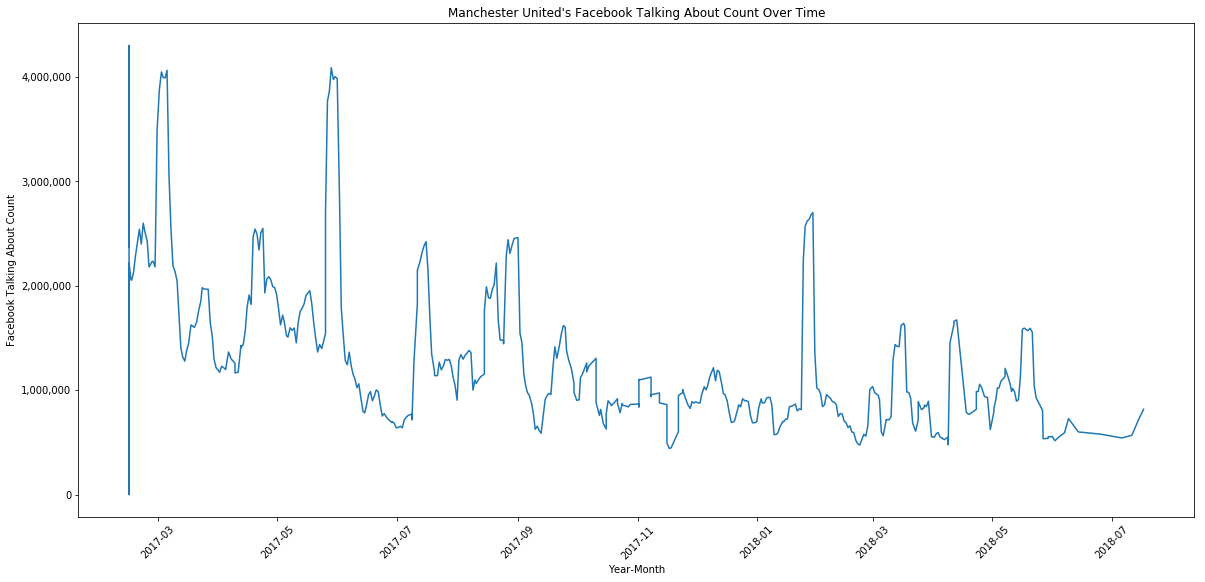

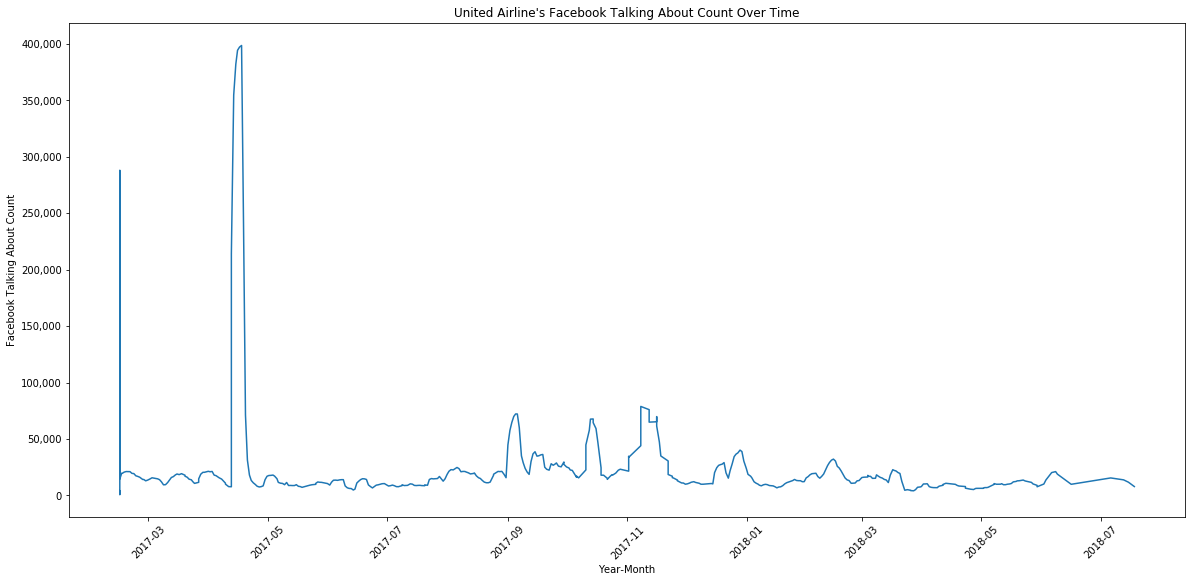

In [11]:
df = facebook[facebook.username == 'manchesterunited'][['talking_about_count','date_updated']]
df2 = facebook[facebook.username == 'United'][['talking_about_count','date_updated']]

plt.figure(figsize=(20,20))

ax1 = plt.subplot(2, 1, 1)
sns.lineplot(y='talking_about_count', x='date_updated', data=df)
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
plt.xticks(rotation=45)
plt.ylabel('Facebook Talking About Count')
plt.xlabel('Year-Month')
plt.title("Manchester United's Facebook Talking About Count Over Time")
plt.show()

plt.figure(figsize=(20,20))
ax2 = plt.subplot(2, 1, 2)
sns.lineplot(y='talking_about_count', x='date_updated', data=df2)
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])
plt.xticks(rotation=45)
plt.ylabel('Facebook Talking About Count')
plt.xlabel('Year-Month')
plt.title("United Airline's Facebook Talking About Count Over Time")
plt.show()

Looking at the visuals, we can see that the volatility for each company has a different character. While the "talking_about_count" for Manchester United regularly varies over time with a few notable spikes, the volatility of the "talking_about_count" for United Airlines mainly results from just one spike. Given that Manchester United is a sports team, the volatility of how frequently it is talked about on Facebook is to be expected. Days they have games, especially if they win, are days we would expect the organization to be talked about more. The spikes are likely explainable by important games that were won or significant changes to the team roster via new contracts or trades. In contrast, there is no obvious explanation for the spike in United Airlines being talked about more on Facebook. Checking the news for United Airlines around that time, we can see that the spike was caused by an incident in which a passenger was forcibly removed from a United Airlines airplane. So, in this case we can explain what caused the spike, but it is likely not useful information for United Airlines with respect to how to generate more discussion about the company on Facebook (in fact they likely would want to avoid any similar incident from happening in the future). 

### Second Visualization:

For the second visualization I will look at businesses that have lots of check-ins.

In [4]:
df3 = facebook.groupby('username')['checkins'].sum().sort_values(ascending=False)

Looking at the top 50, I see some ski resorts that are geographically very close to each other in Colorado. We can see whether the number of checkins at one ski resort have any impact on the number of checkins at another nearby resort.

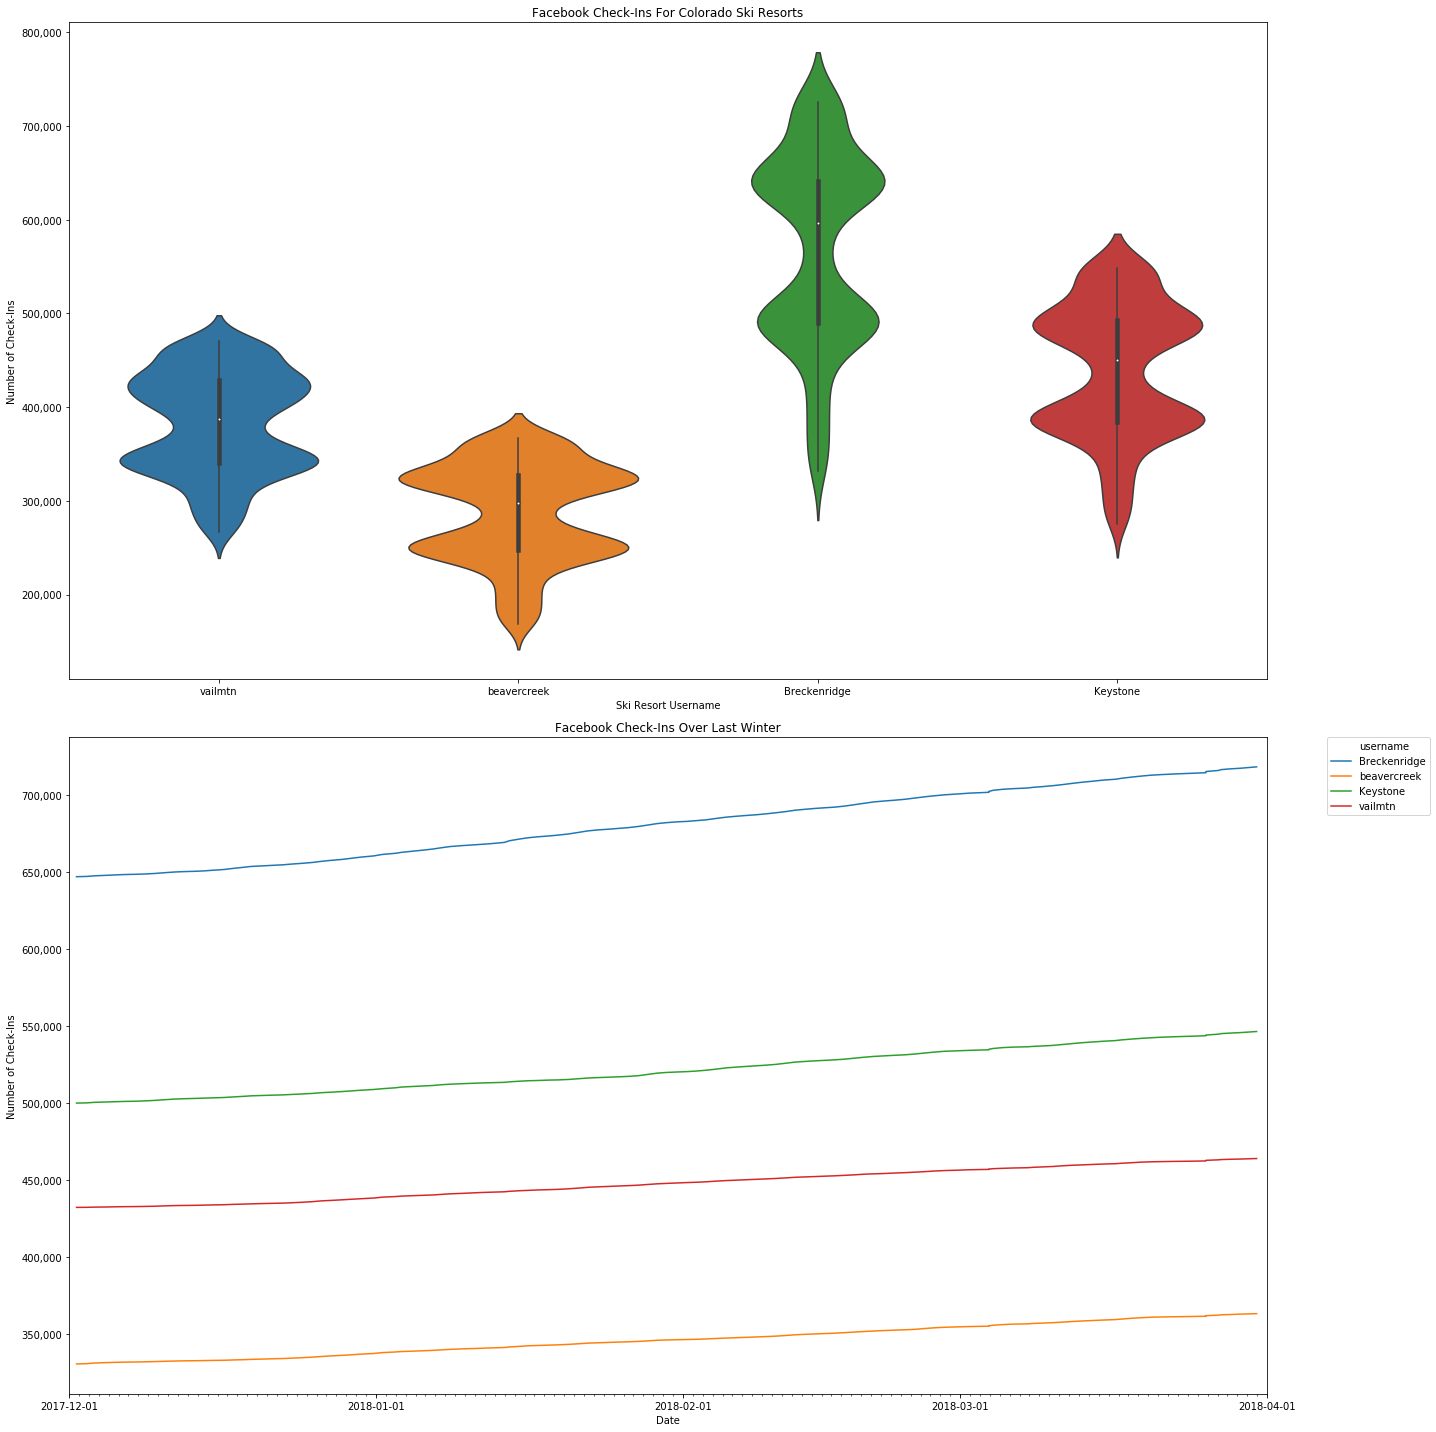

In [8]:
ski_list = ['vailmtn', 'Breckenridge', 'Keystone','beavercreek']
dfski = facebook[facebook['username'].isin(ski_list)]

mask = (dfski['date_updated'] > '2017-12-01') & (dfski['date_updated'] <= '2018-03-31')
dfski_winter = dfski[mask]

plt.figure(figsize=(20,20))

ax1 = plt.subplot(2, 1, 1)
sns.violinplot(y='checkins', x='username', data=dfski)
ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
plt.ylabel('Number of Check-Ins')
plt.xlabel('Ski Resort Username')
plt.title("Facebook Check-Ins For Colorado Ski Resorts")


ax2 = plt.subplot(2, 1, 2)
sns.lineplot(y='checkins', x='date_updated', hue='username', data=dfski_winter)
ax2.set_yticklabels(['{:,}'.format(int(x)) for x in ax2.get_yticks().tolist()])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Number of Check-Ins')
plt.xlabel('Date')
plt.title("Facebook Check-Ins Over Last Winter")

years = mdates.YearLocator()   
months = mdates.MonthLocator()  
days = mdates.DayLocator()
Fmt = mdates.DateFormatter('%Y-%m-%d')

ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(Fmt)
ax2.xaxis.set_minor_locator(days)

datemin = np.datetime64(dfski_winter.date_updated[2802113], 'M')
datemax = np.datetime64(dfski_winter.date_updated[3334174], 'M') + np.timedelta64(1, 'M')
ax2.set_xlim(datemin, datemax)

plt.tight_layout()

plt.show()

We can see from this visual that Breckenridge ski resort is the clear winner when it comes to check-ins on Facebook. There are many possible explanations for why, but the other ski resorts could at the very least investigate whether there are any clear strategies Breckenridge uses to generate this sort of interaction on Facebook and if so consider if it is worth adopting. Perhaps more surprising though is how stable the differences in check-ins between these ski resorts throughout the winter. While for a give ski resort, getting potential customers to come visit the resort rather than another is obviously important, we might infer that getting more people to ski in Colorado is beneficial to the ski resorts proportionally. One potential explanation is that when one ski resort gets crowded people redistribute to nearby ski resorts. Whatever the case it suggests the somewhat counterintuitive strategy of working with other ski resorts to attract potential customers to the area is worth further consideration. 